# GUS 2017 and 2018 comparison data

In [1]:
from pandas import read_csv, read_excel, Series, concat, wide_to_long
import seaborn as sns
import numpy as np
from helpers.plots import labels

### Comparison of 2017 and 2018 GUS data about age distribution in Polish population

GUS data form 2017 were used in my master thesis, as 2018 data were not available at the time of writing my master thesis. Now I have decided to use 2018 data as they become available.

**Data 2017 source:** [Central Statistical Office in Poland, *Population in Poland. Size and structure by territorial division As of June 30, 2017*](https://stat.gov.pl/files/gfx/portalinformacyjny/pl/defaultaktualnosci/5468/6/22/1/ludnosc._stan_i_struktura_w_przekroju_terytorialnym._stan_w_dniu_30.06.2017.pdf)

In [2]:
gus_2017_all = read_csv("data/gus_age_2017.csv")

- `gus_2017` - age data inferred from the 2017 report
- `gus_2018` - age data from the 2018 report

In [3]:
gus_2017_all = gus_2017_all.assign(age_in_2018=gus_2017_all.age + 1)
gus_2017 = gus_2017_all[gus_2017_all.age_in_2018 <= 21]
gus_2017.head(2)

,age,total,males,females,city_total,city_males,city_females,rural_total,rural_male,rural_female,age_in_2018
0,15,360165,184738,175427,192475,98690,93785,167690,86048,81642,16
1,16,371338,190380,180958,200959,102629,98330,170379,87751,82628,17


**Data 2018 source:** [Central Statistical Office in Poland, *Ludność. Stan i struktura oraz ruch naturalny w przekroju terytorialnym w 2018 r. Stan w dniu 31 XII*](https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/ludnosc-stan-i-struktura-oraz-ruch-naturalny-w-przekroju-terytorialnym-w-2018-r-stan-w-dniu-31-xii,6,25.html)


In [4]:
gus_2018_all = read_excel(
    "data/03_ludnosć_struktura wg wieku_RD'2019.xls",
    sheet_name="Tablica 15 ", index_col=0
)

In [5]:
gus_2018_all.iloc[[5, 6]]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
WIEK \nAGE,Ogółem Total,Mężczyźni Males,Kobiety Females,Miasta Urban areas,NaN,NaN,Wieś Rural areas,NaN,NaN
NaN,NaN,NaN,NaN,razem total,mężczyźni males,kobiety females,razem total,mężczyźni males,kobiety females


In [6]:
gus_2018 = gus_2018_all.loc[range(16, 22)]

In [7]:
gus_2018 = gus_2018.reset_index()
gus_2018.columns = (
    'age total males females city_total city_males '
    'city_females rural_total rural_male rural_female'
).split()
gus_2018.head(2)

,age,total,males,females,city_total,city_males,city_females,rural_total,rural_male,rural_female
0,16,353738,181515,172223,195234,99504,95730,158504,82011,76493
1,17,366102,187690,178412,201651,102767,98884,164451,84923,79528


In [8]:
x = np.repeat(gus_2017.age_in_2018, gus_2017.total)
y = np.repeat(gus_2018.age, gus_2018.total)

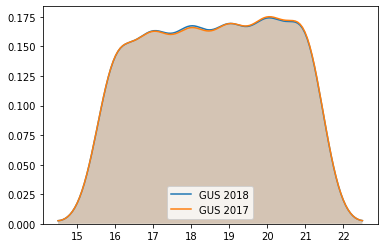

In [9]:
sns.kdeplot(y, bw=.5, label="GUS 2018", shade=True)
sns.kdeplot(x, bw=.5, label="GUS 2017", shade=True);

In [10]:
ages = Series(gus_2017.age_in_2018, name="age")
GUS_2017 = Series(gus_2017.total, name="GUS2017")
GUS_2018 = Series(gus_2018.total, name="GUS2018")
age_compare = concat([ages, GUS_2017, GUS_2018], axis=1)
age_compare.head(2)

,age,GUS2017,GUS2018
0,16,360165,353738
1,17,371338,366102


In [11]:
age_compare["id"] = age_compare.index
GUS_age_compare = wide_to_long(age_compare, ["GUS"], i="id", j="year")
GUS_age_compare = GUS_age_compare.reset_index()
GUS_age_compare.head(2)

,id,year,age,GUS
0,0,2017,16,360165
1,1,2017,17,371338


Difference in age groups between 2017 and 2018 is small.

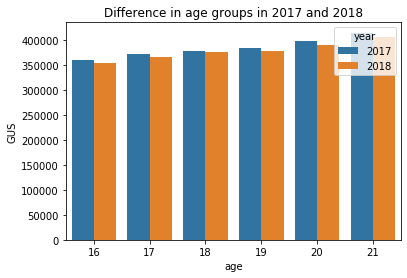

In [12]:
sns.barplot(
    x="age", y="GUS", hue="year",
    data=GUS_age_compare,
)
labels(title="Difference in age groups in 2017 and 2018")